# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [50]:
%matplotlib inline

In [51]:
credit = pd.read_csv('base02.csv')

In [52]:
credit

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,3,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,4,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,6,1,0,1,0,27.482192,4.024658,1,0,1,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,16644,1,0,1,1,34.857534,3.101370,1,1,1,...,1,0,0,1,0,1,0,0,0,0
6766,16645,1,0,1,0,54.109589,9.884932,1,0,0,...,1,0,0,0,0,1,0,0,0,0
6767,16646,1,0,1,0,43.389041,7.380822,1,1,1,...,1,1,0,0,0,1,0,0,0,0
6768,16647,0,1,1,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0


In [53]:
credit.drop('Unnamed: 0', axis = 1, inplace = True)

In [54]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

In [55]:
credit[['estado_civil_Separated','estado_civil_Single / not married','mau']].groupby(['estado_civil_Separated','estado_civil_Single / not married']).count()

mau
estado_civil_Separated estado_civil_Single / not married      
0                      0                                  5509
                       1                                   862
1                      0                                   399

In [56]:
X = credit.drop('mau', axis = 1)

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

In [58]:
y = credit['mau']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [60]:
#1
clf = DecisionTreeClassifier(random_state=100)

In [61]:
#2
clf = clf.fit(X_train,y_train)

In [62]:
clf

DecisionTreeClassifier(random_state=100)

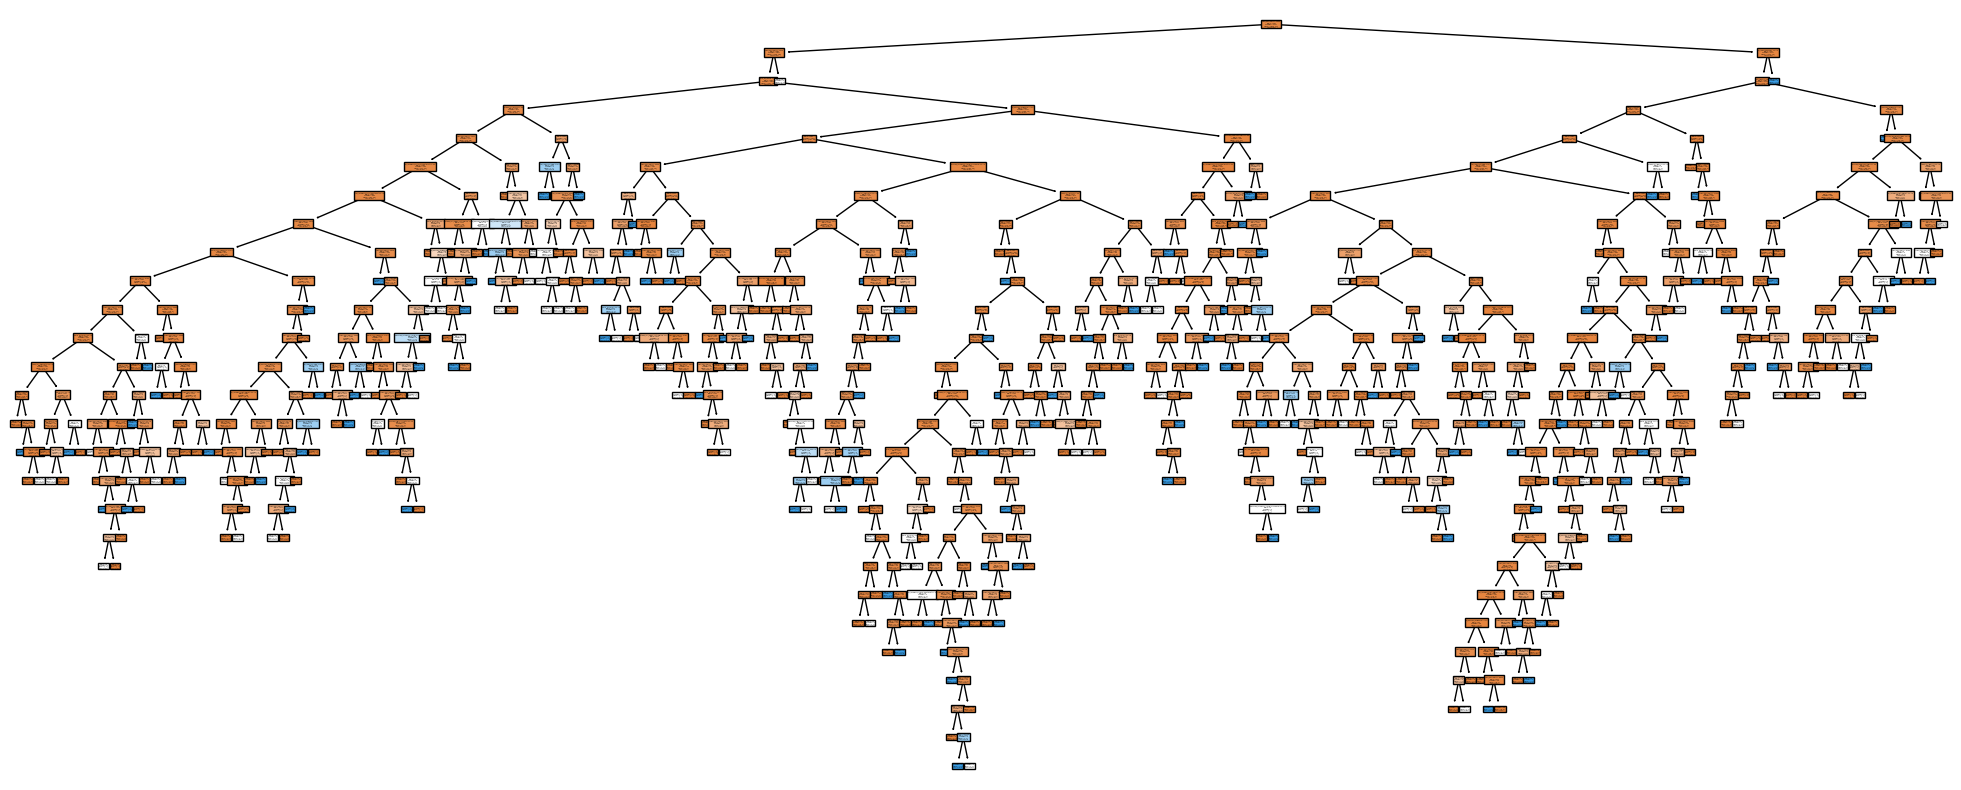

In [63]:
#3
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Mau', 'Bom'],
          feature_names=list(X.columns));

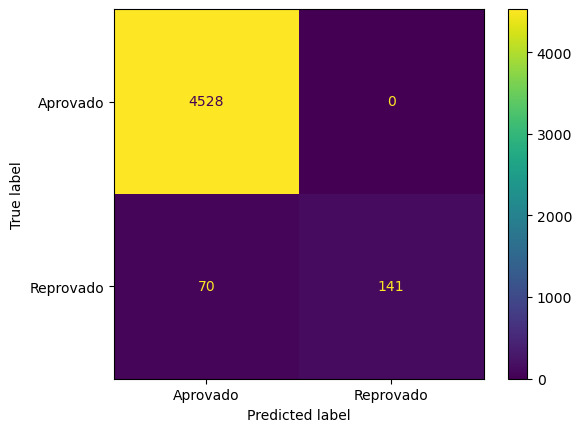

In [64]:
#4
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])

MatrizDeConfusao.plot();

In [65]:
#5
accuracy_score(y_train, clf.predict(X_train))

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

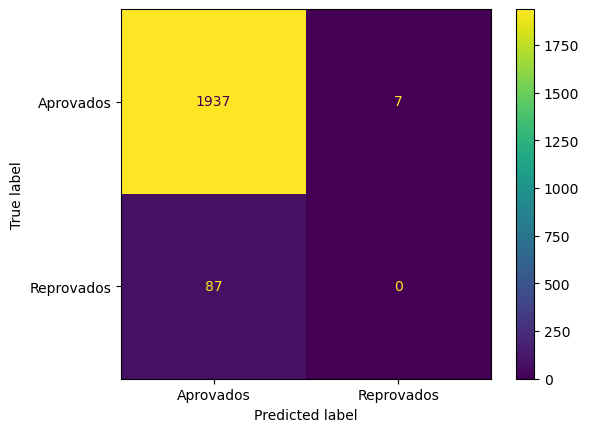

In [75]:
#1
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot();

In [67]:
#3
accuracy_score(y_test, clf.predict(X_test))

0.9167897587395372

In [68]:
#4
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10 ,random_state=123)
clf = clf.fit(X_train,y_train)


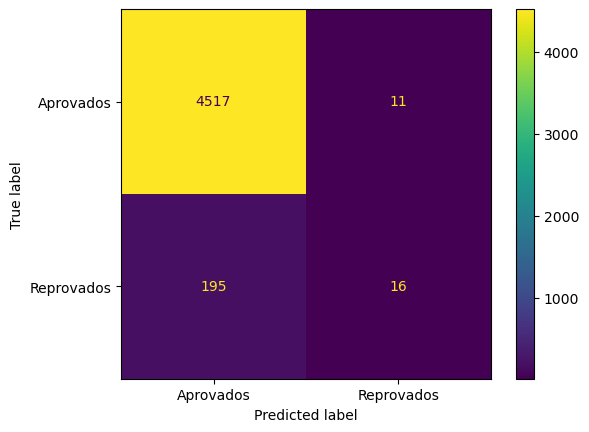

In [69]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot();

In [70]:
accuracy_score(y_test, clf.predict(X_test))

0.9537173806006893

In [71]:
clf

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

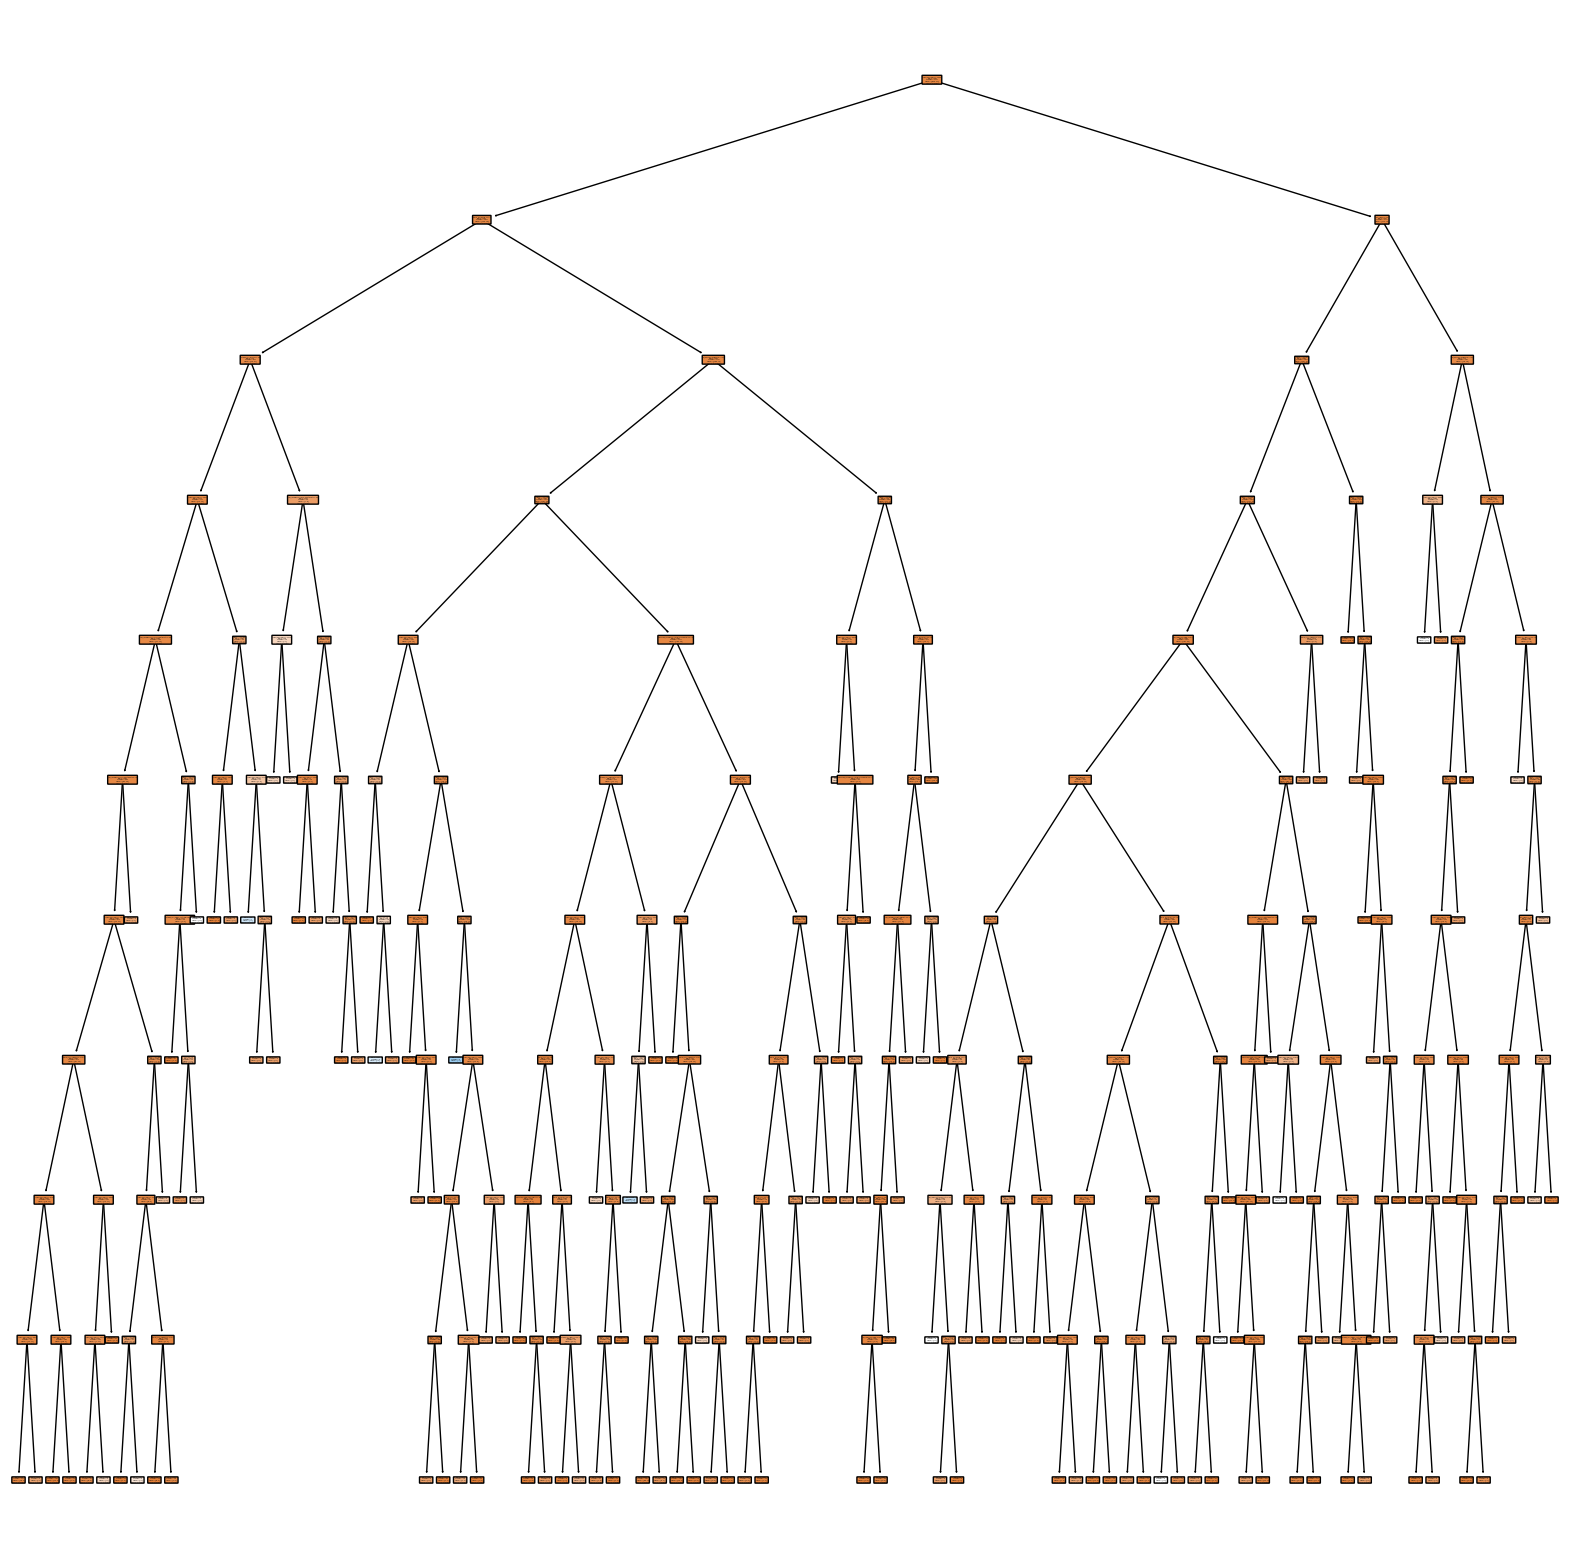

In [72]:
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=list(X_train.columns));

In [73]:
mal = (clf.predict(X_train) == 1).sum()
total = len(X_train)
proporcao_mal = mal/total

proporcao_mal

0.005697404515720616

In [91]:
#5
y_test[y_test == 1] = 0

In [97]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test,y_test)

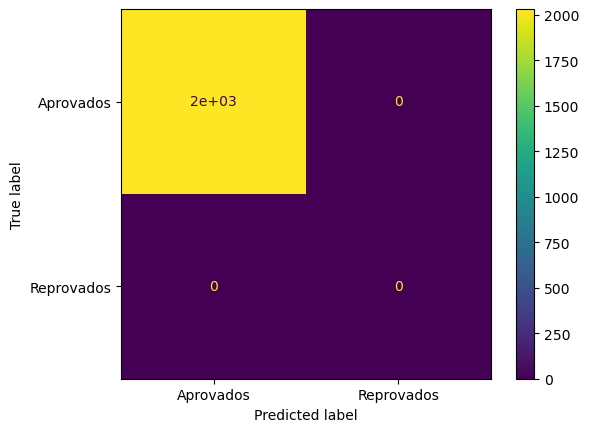

In [101]:
cm = confusion_matrix(y_test, clf.predict(X_test))
if cm.shape != (2, 2):
    # Se não tiver, crie uma matriz 2x2 com os valores disponíveis
    cm_completa = np.zeros((2, 2))
    for i in range(min(2, cm.shape[0])):
        for j in range(min(2, cm.shape[1])):
            cm_completa[i, j] = cm[i, j]
    cm = cm_completa

# Agora crie a visualização da matriz de confusão
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

# Plote a matriz
MatrizDeConfusao.plot()
plt.show() 

In [103]:
accuracy_score(y_test, clf.predict(X_test))

1.0